In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df_original = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df = df_original.copy()

print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


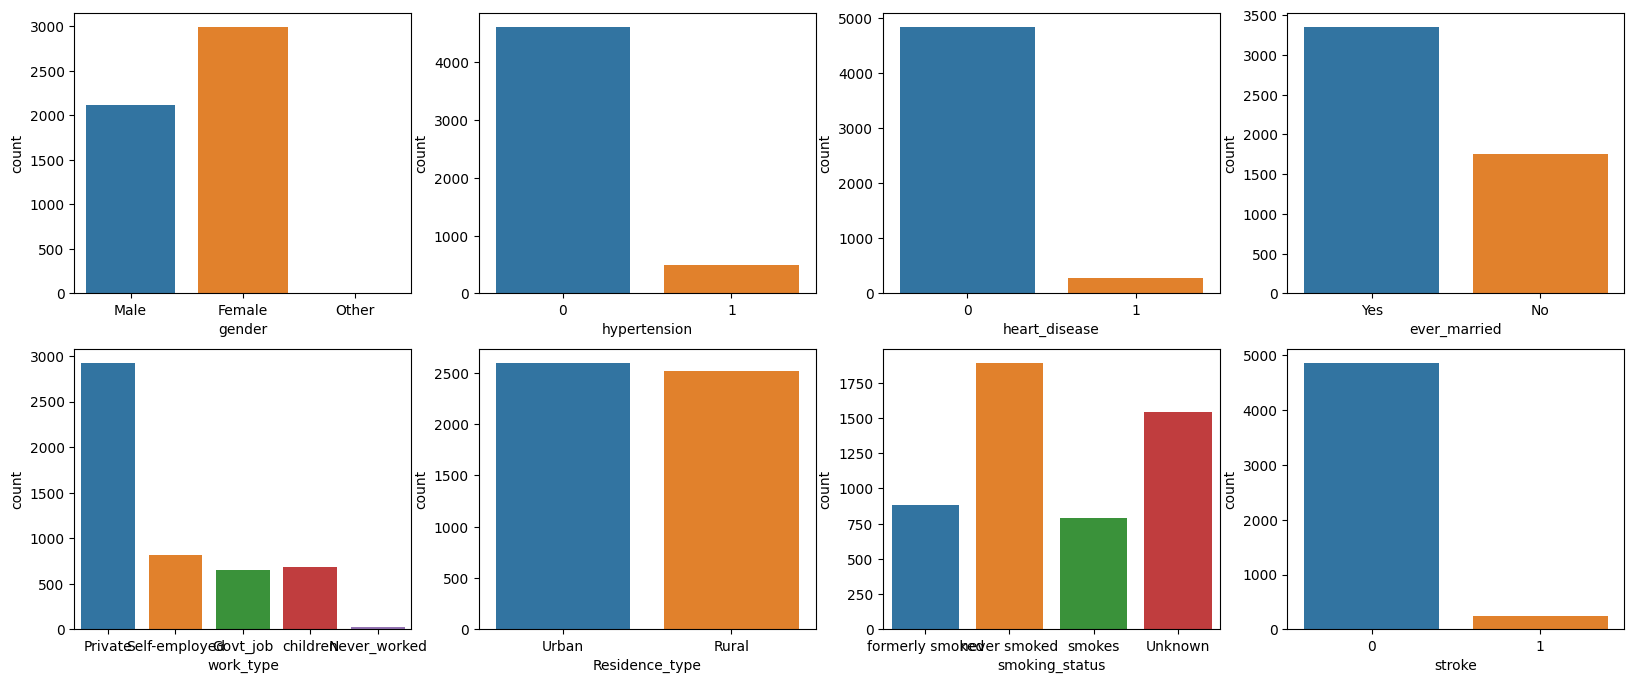

In [5]:
# 범주형 데이터 분포 확인
df.drop(["id"], axis=1, inplace=True)
category_data = ["gender","hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]

fig, axs = plt.subplots(figsize=(20,8), nrows=2, ncols=4)
for i, feature in enumerate(category_data):
    row = int(i/4)
    col = i%4
    sns.countplot(x=feature, data=df, ax=axs[row][col])

In [6]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
# gender 컬럼의 other 제거
df.drop(df[df["gender"] == "Other"].index, inplace=True)

In [8]:
# smoking_status 칼럼의 Unknown 비율 확인
unknown_count = df["smoking_status"].value_counts().loc["Unknown"]
total_count = df["smoking_status"].count()
unknown_percentage = round(unknown_count/total_count , 2)
print(f'{unknown_percentage*100}%')

30.0%


In [9]:
df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [10]:
# unknown 에서 stroke 1 의 비율의 전체 stroke 1의 약 20%를 차지함 -> 삭제 보류.
df[df["smoking_status"] == "Unknown"]["stroke"].value_counts()

0    1497
1      47
Name: stroke, dtype: int64

**각 카테고리 피쳐 별 stroke 유무 시각화**

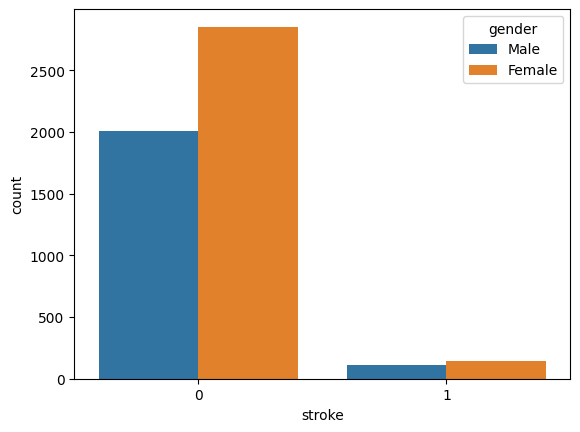

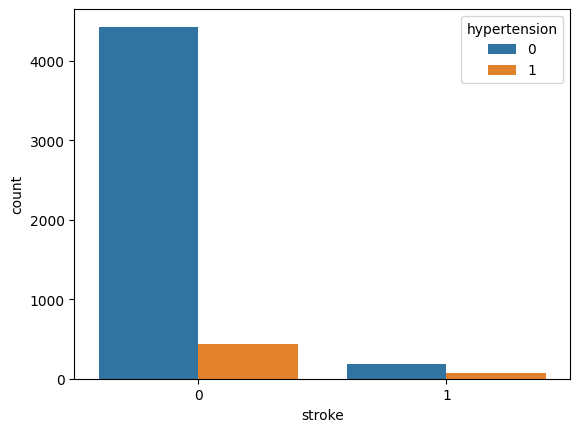

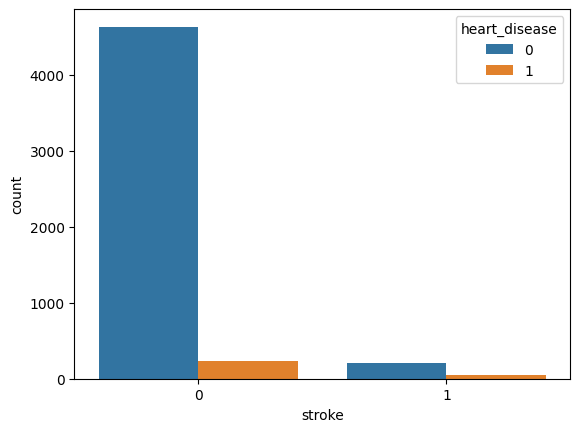

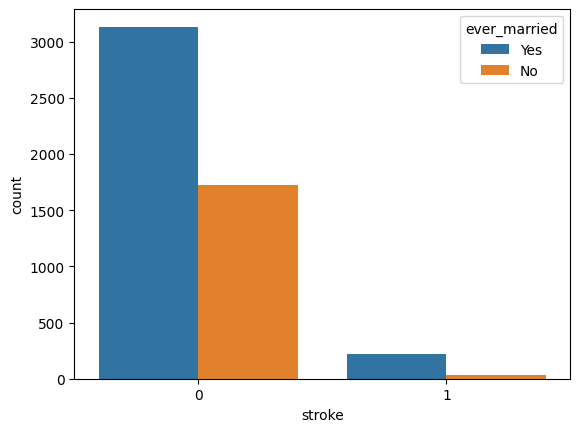

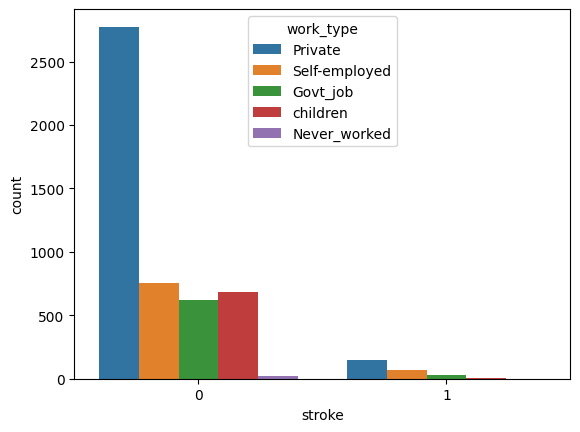

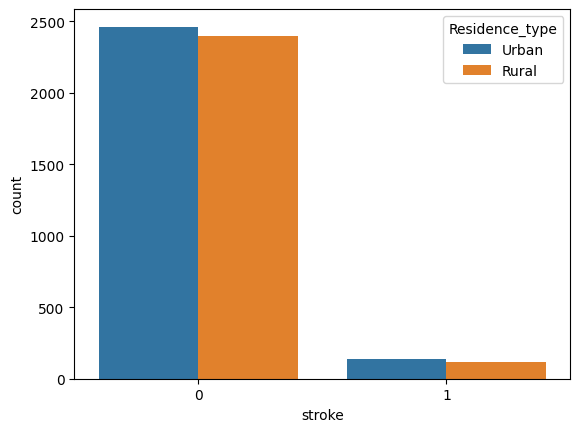

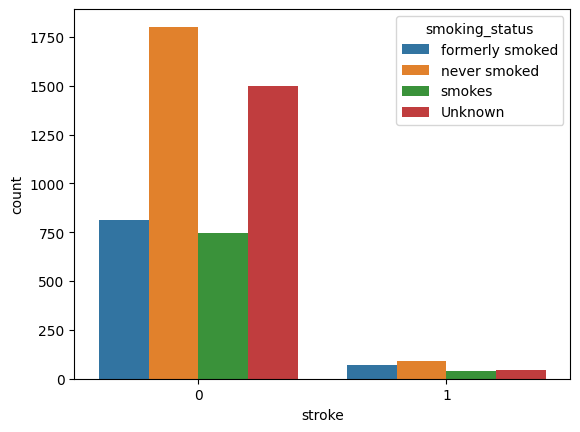

In [11]:
category_data = ["gender","hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
for feature in category_data:
    sns.countplot(x="stroke", hue=feature, data=df)
    plt.show()

**연속형 데이터 분포 확인**

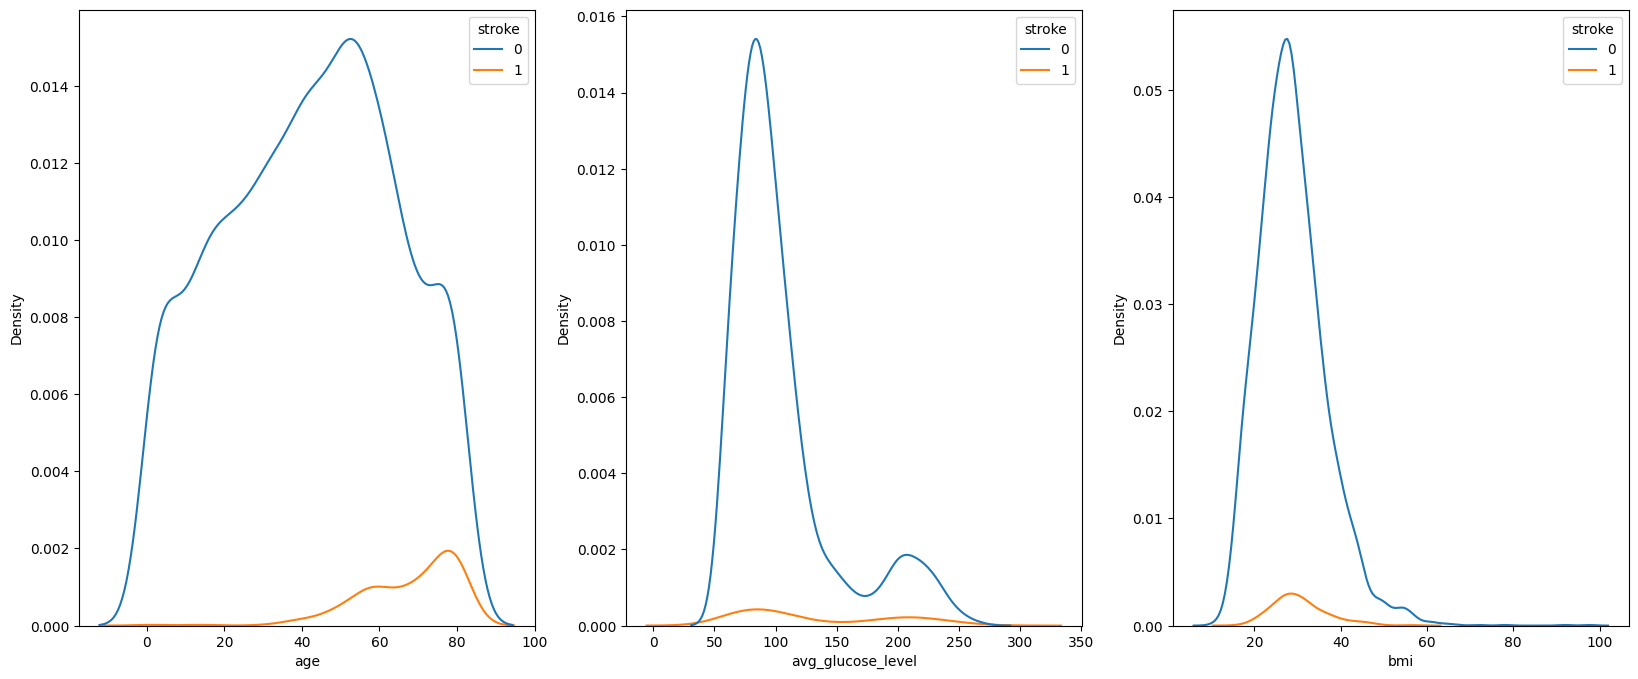

In [13]:
continuous_feature = ["age", "avg_glucose_level", "bmi"]
fig, axs = plt.subplots(figsize=(20,8), nrows=1, ncols=3, squeeze=False)

for i, feature in enumerate(continuous_feature):
    row = int(i/3)
    col = i%3
    sns.kdeplot(x=feature, data=df, ax=axs[row][col], hue = "stroke")

# preprocessing

**missing values**

In [15]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [17]:
df_bmi_null = df[df["bmi"].isna()]
df_bmi_null["stroke"].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [18]:
df["bmi"].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

**결측치 해당 칼럼의 평균으로 대체.**

In [19]:
# 결측치 해당 칼럼의 평균으로 대체.
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

**이진 범주형은 0,1로 변환**

In [20]:
# 이진 범주형은 0,1로 변환
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0 )
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

**원 핫 인코딩**

In [21]:
df= pd.get_dummies(df)